In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/apple/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('/Users/apple/Downloads/Fraud.csv')

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [27]:
df.shape

(6362620, 11)

In [28]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [30]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [31]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# EDA

In [62]:
df['isFlaggedFraud'].value_counts()
# Highly imbalanced column for that consider to remove

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.step.describe()

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

In [34]:
print(df.step.min())
print(df.step.max())

1
743


In [35]:
# dataset having 743 hours transaction
# 743/24 = 30 days transaction

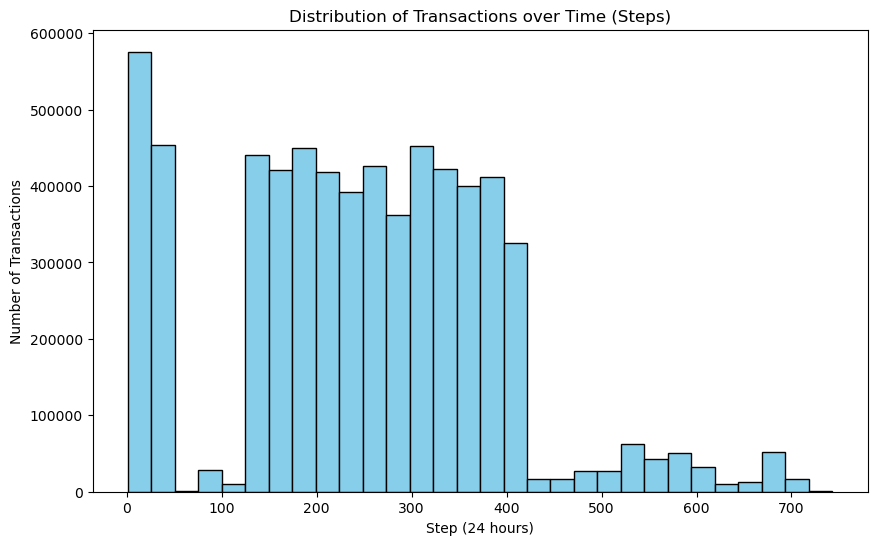

In [36]:
# Plot histogram of 'step'
plt.figure(figsize=(10,6))
plt.hist(df['step'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions over Time (Steps)')
plt.xlabel('Step (24 hours)')
plt.ylabel('Number of Transactions')
plt.show()

In [37]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type'>

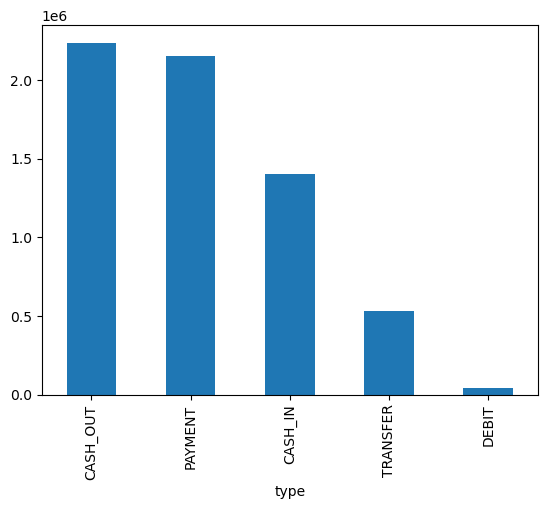

In [38]:
df.type.value_counts().plot(kind = 'bar')

<Axes: xlabel='type', ylabel='amount'>

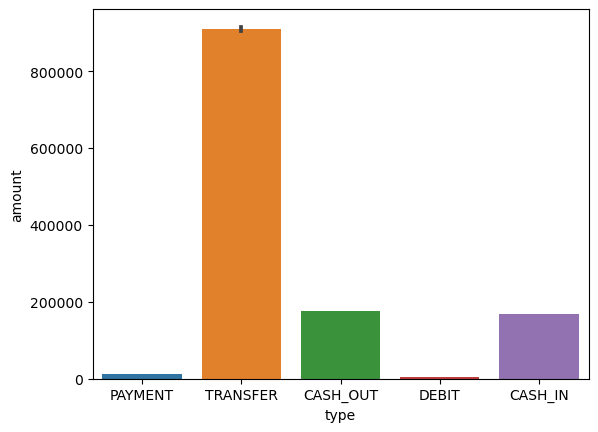

In [39]:
sns.barplot(x = 'type' , y = 'amount',data = df)
# transfer amount is more(one account to another account)

In [28]:
(df[df['type'] == 'TRANSFER']['amount'].sum()) / 10000000 #cr

48529.19872631698

<Axes: xlabel='isFraud'>

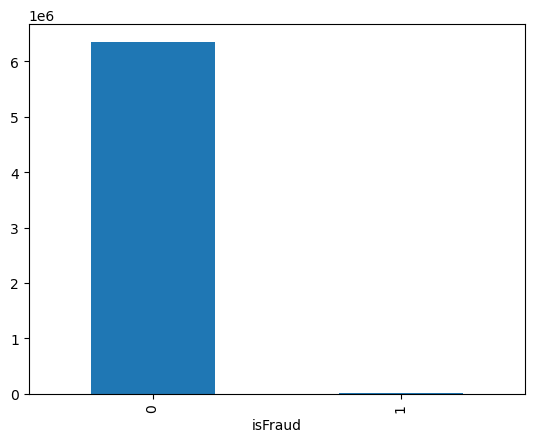

In [69]:
df.isFraud.value_counts().plot(kind = 'bar')

<Axes: xlabel='isFraud', ylabel='amount'>

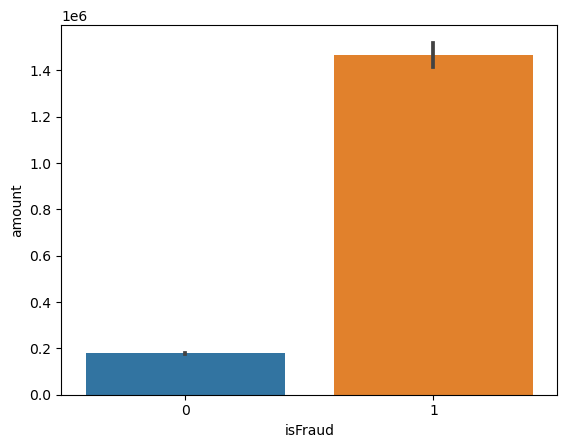

In [29]:
sns.barplot(x = 'isFraud' , y = 'amount' , data = df)

In [37]:
df[df['isFlaggedFraud'] == 1 ]['amount'].min()

353874.22

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2373/1305621955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['isFraud'] == 0]['amount'])
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2373/1305621955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

<Axes: xlabel='amount', ylabel='Density'>

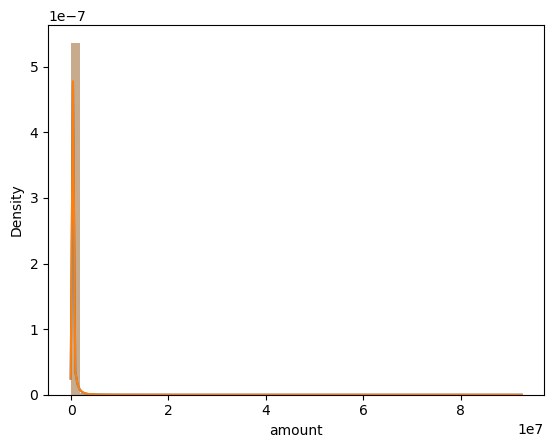

In [45]:
sns.distplot(df[df['isFraud'] == 0]['amount'])
sns.distplot(df[df['isFlaggedFraud'] == 0]['amount'])

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2373/957358824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['isFraud'] == 1]['amount'])
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2373/957358824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

<Axes: xlabel='amount', ylabel='Density'>

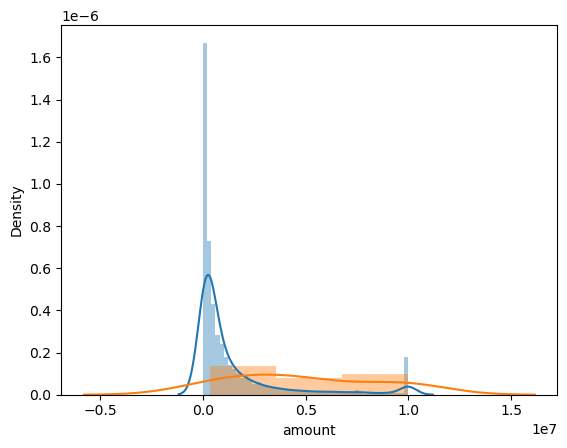

In [46]:
sns.distplot(df[df['isFraud'] == 1]['amount'])
sns.distplot(df[df['isFlaggedFraud'] == 1]['amount'])

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2373/767412680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['isFlaggedFraud'] == 0]['amount'] > 200000)
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Density'>

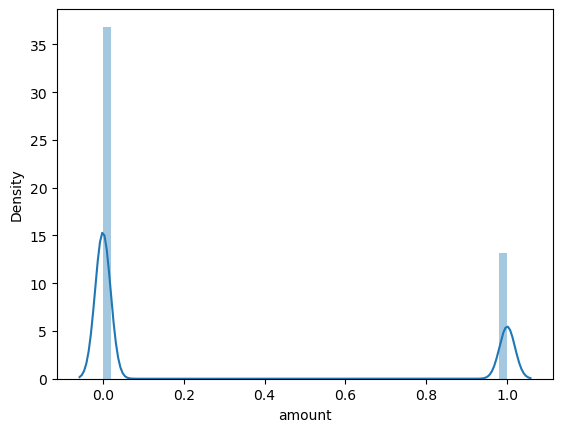

In [47]:
sns.distplot(df[df['isFlaggedFraud'] == 0]['amount'] > 200000)

In [73]:
# more than 2000000 amount transaction have not got flagged by the system
(df[df['isFlaggedFraud'] == 0]['amount'] > 200000).value_counts()[1]

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2373/3668495268.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df[df['isFlaggedFraud'] == 0]['amount'] > 200000).value_counts()[1]


1673554

In [72]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [71]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [75]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [41]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

# outlier

<Axes: >

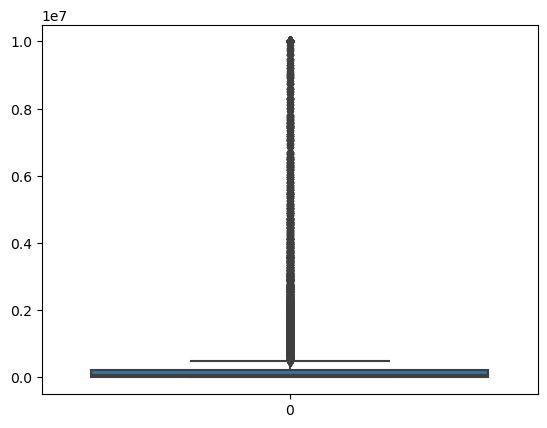

In [71]:
sns.boxplot(df['amount'])

In [46]:
# checking Outliers
q1 = df.describe().transpose()['25%'][1]
q3 = df.describe().transpose()['75%'][1]

IQR = q3 - q1

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2833/692787604.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q1 = df.describe().transpose()['25%'][1]
/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2833/692787604.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q3 = df.describe().transpose()['75%'][1]


In [64]:
lower_boundry  = q1 - 1.5 * IQR
upper_boundry  = q3 + 1.5 * IQR

In [70]:
(df[df['amount'] < lower_boundry]['isFraud'] == 0).value_counts()

Series([], Name: count, dtype: int64)

In [65]:
(df[df['amount'] > upper_boundry]['isFraud'] == 0).value_counts()

isFraud
True     334224
False      3854
Name: count, dtype: int64

In [66]:
# Capping the Non Fraud above upper_boundry and keeping the Frauds above upper boundry

df.loc[(df['amount'] > upper_boundry) & (df['isFraud'] == 0), 'amount'] = upper_boundry


In [88]:
# Number of Fraud Transaction above the Upper boundry
print((df[df['amount'] > upper_boundry]['isFraud'] == 1).value_counts())


isFraud
True    3854
Name: count, dtype: int64


# Check for Multicollinearity

In [4]:
numerical_columns = df.select_dtypes(include=[np.number])
numerical_columns.corr()['isFlaggedFraud']

step              0.003277
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
isFraud           0.044109
isFlaggedFraud    1.000000
Name: isFlaggedFraud, dtype: float64

In [83]:
numerical_columns.corr()['isFraud']

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

In [5]:
# Plot heatmap
numerical_columns.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


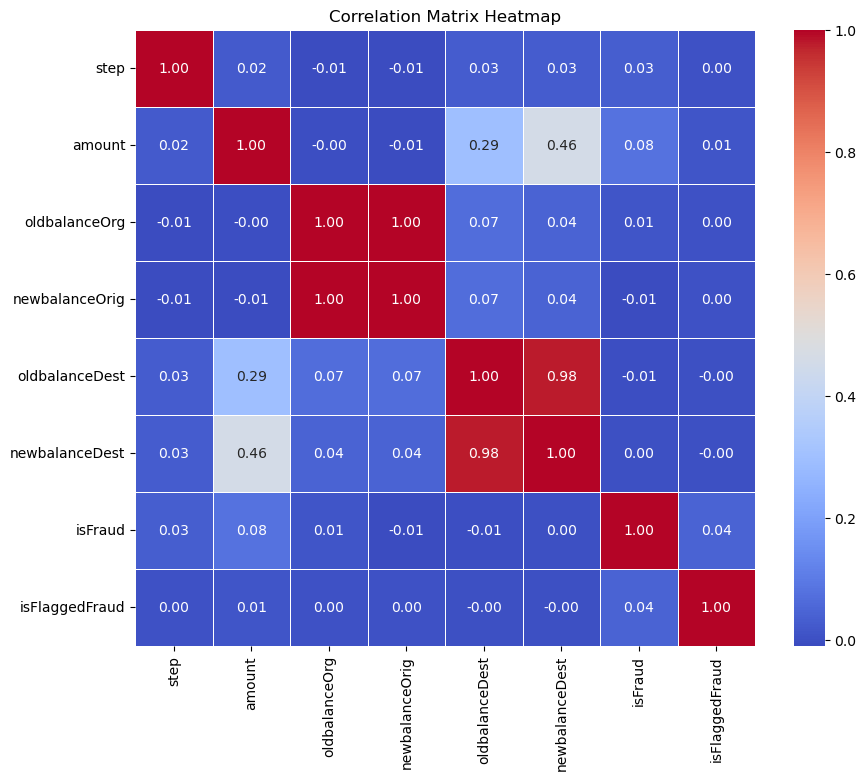

In [92]:

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Feature Selection

In [97]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [94]:
# oldbalanceOrg and newbalanceOrig are highly correlated (0.9988).
# oldbalanceDest and newbalanceDest are also highly correlated (0.9766).


In [95]:
# drop newbalanceOrig,newbalanceDest because highly co-realted to oldbalanceOrg,oldbalanceDest
# Keep oldbalanceDest,oldbalanceOrg  because its sligtly co related to detecting fraudulent transactions.
# drop isFlaggedFraud because highly imbalanced data

In [98]:
# Keeping step , type , amount ,oldbalanceOrg,oldbalanceDest,isFraud

In [214]:
# Keep only the specified columns
df_cleaned = df[['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']]

# Export the cleaned dataset
df_cleaned.to_csv('transaction_cleaned_dataset.csv', index=False)

In [215]:
transaction_df = pd.read_csv('transaction_cleaned_dataset.csv')

In [216]:
# lets check once  Outliers
q1 = transaction_df.describe().transpose()['25%'][1]
q3 = transaction_df.describe().transpose()['75%'][1]

IQR = q3 - q1
lower_boundry_  = q1 - 1.5 * IQR
upper_boundry_  = q3 + 1.5 * IQR
print((df[df['amount'] < lower_boundry]['isFraud'] == 0).value_counts())
print((df[df['amount'] > upper_boundry]['isFraud'] == 0).value_counts())

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2833/3952012499.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q1 = transaction_df.describe().transpose()['25%'][1]


Series([], Name: count, dtype: int64)
isFraud
False    3854
Name: count, dtype: int64


/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2833/3952012499.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q3 = transaction_df.describe().transpose()['75%'][1]


In [217]:
transaction_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.0,1
3,1,CASH_OUT,181.00,181.0,21182.0,1
4,1,PAYMENT,11668.14,41554.0,0.0,0


In [218]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   oldbalanceDest  float64
 5   isFraud         int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 291.3+ MB


In [219]:
transaction_df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud'], dtype='object')

In [220]:
transaction_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [221]:
transaction_df['step'].max()

743

In [222]:
transaction_df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [223]:
transaction_df.describe().min()

step              1.0
amount            0.0
oldbalanceOrg     0.0
oldbalanceDest    0.0
isFraud           0.0
dtype: float64

In [224]:
transaction_df['step'].min()

1

# For imbalanced dataset extract fraud and non - fraud and shuffle both

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
transaction_df = pd.read_csv('transaction_cleaned_dataset.csv')



# Separate fraud and non-fraud samples
fraud_df = transaction_df[transaction_df['isFraud'] == 1]
non_fraud_df = transaction_df[transaction_df['isFraud'] == 0]



# Sample non-fraud to match the number of fraud cases
non_fraud_sampled = non_fraud_df.sample(n=len(fraud_df), random_state=42)



# Combine the sampled non-fraud cases with the fraud cases
balanced_df = pd.concat([fraud_df, non_fraud_sampled])



# Shuffle the balanced dataset
balanced_df = shuffle(balanced_df, random_state=42)



# Separate features and target
X = balanced_df.drop('isFraud', axis=1)
y = balanced_df['isFraud']



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# OneHotEncode the 'type' column
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train[['type']])
X_test_encoded = ohe.transform(X_test[['type']])



# Replace the original 'type' column with the encoded values
X_train_rest = X_train.drop('type', axis=1)
X_test_rest = X_test.drop('type', axis=1)



# Concatenate encoded 'type' with the rest of the dataset
X_train_final = np.concatenate([X_train_rest, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_rest, X_test_encoded], axis=1)



# Apply PowerTransformer for normalizing the features
transform = PowerTransformer(method='yeo-johnson')
X_train_final = transform.fit_transform(X_train_final)
X_test_final = transform.transform(X_test_final)



# Train a RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_final, y_train)



# Predict on the test set
y_pred = clf.predict(X_test_final)



# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.985392574558734
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1622
           1       0.98      0.99      0.99      1664

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [5]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   oldbalanceDest  float64
 5   isFraud         int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 291.3+ MB


In [4]:

# Cross-validation on training data
cv_scores = cross_val_score(clf, X_train_final, y_train, cv=5)  # Using 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.97564688 0.98211568 0.98249619 0.98287671 0.98363775]
Mean Cross-Validation Score: 0.9813546423135463
Standard Deviation of Cross-Validation Scores: 0.0028979349717899202


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', sparse_output=False), ['type']),
        ('power', PowerTransformer(method='yeo-johnson'), X_train.columns.drop('type'))
    ], remainder='passthrough'
)


# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Train the model
pipeline.fit(X_train, y_train)


# Predict on the test set
y_pred = pipeline.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9847839318320146
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1622
           1       0.98      0.99      0.99      1664

    accuracy                           0.98      3286
   macro avg       0.99      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286



In [6]:
import pickle

In [10]:
pickle.dump(pipeline,open('fraud_detection__2.pkl','wb'))

In [8]:
import sklearn

In [9]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.2.2
1.24.3
1.5.1


In [11]:
transaction_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.0,1
3,1,CASH_OUT,181.00,181.0,21182.0,1
4,1,PAYMENT,11668.14,41554.0,0.0,0


In [7]:
transaction_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
transaction_df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud'], dtype='object')

In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   oldbalanceDest  float64
 5   isFraud         int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 291.3+ MB
